In [1]:
#import libraries
import pandas as pd
import numpy as np
from collections import defaultdict

In [2]:
#read data
data = pd.read_csv('soccer17.csv')

In [3]:
#look at data
data.head()

,Div,Date,Y,HomeTeam,AwayTeam,FTHG,FTAG,HTHG,HTAG,pH,pD,pA
0,EPL,2014-08-16,14,Arsenal,Crystal Palace,2,1,1,1,0.778038,0.151989,0.069973
1,EPL,2014-08-16,14,Leicester,Everton,2,2,1,2,0.311972,0.289820,0.398208
2,EPL,2014-08-16,14,Man United,Swansea,1,2,0,1,0.715373,0.192169,0.092459
3,EPL,2014-08-16,14,QPR,Hull,0,1,0,0,0.395113,0.300577,0.304311
4,EPL,2014-08-16,14,Stoke,Aston Villa,0,1,0,0,0.502378,0.282316,0.215305


In [4]:
#check for missings
data.isna().sum()

Div         0
Date        0
Y           0
HomeTeam    0
AwayTeam    0
FTHG        0
FTAG        0
HTHG        0
HTAG        0
pH          0
pD          0
pA          0
dtype: int64

## 1. Goal Differentials
#### Recreating the '17 EPL standings and team stats from just a list of games

In [5]:
# only data for problem
a1_data = data[(data.Y == 17) & (data.Div == 'EPL')]

In [6]:
# make groupbys
a1_home = a1_data.groupby('HomeTeam')
a1_away = a1_data.groupby('AwayTeam')

In [7]:
# get goals and goals against
home_data = a1_home.sum().loc[:,['FTHG', 'FTAG', 'Y']]
away_data = a1_away.sum().loc[:,['FTAG', 'FTHG', 'Y']]

In [8]:
# rename
away_data.columns = ['GScored', 'GAgainst', 'Games']
home_data.columns = ['GScored', 'GAgainst', 'Games']

In [9]:
# add home and away for total goals per team
total_goals = home_data.add(away_data)

In [10]:
# have to get number of games accurately
total_goals.Games = total_goals.Games /17

In [11]:
# create goal differential feature
total_goals['Goal_Differential'] = total_goals.apply(lambda x: (x.GScored - x.GAgainst)/x.Games, axis=1)

In [12]:
#check progress
total_goals.head()

,GScored,GAgainst,Games,Goal_Differential
HomeTeam,,,,
Arsenal,74,51,38.0,0.605263
Bournemouth,45,61,38.0,-0.421053
Brighton,34,54,38.0,-0.526316
Burnley,36,39,38.0,-0.078947
Chelsea,62,38,38.0,0.631579


In [13]:
# add Winner feature to find W/L/D
a1_data['Winner'] = a1_data.apply(lambda x: x.HomeTeam if x.FTHG > x.FTAG else (x.AwayTeam if x.FTAG > x.FTHG else 'Draw'), axis=1)

C:\Users\ngrif\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [14]:
# get data with quick loop
wins_dict = defaultdict(int)
draws_dict = defaultdict(int)
loss_dict = defaultdict(int)
for i in range(len(a1_data)):
    win = a1_data.iloc[i].Winner
    home = a1_data.iloc[i].HomeTeam
    away = a1_data.iloc[i].AwayTeam
    if win == 'Draw':
        draws_dict[home] += 1
        draws_dict[away] += 1 
    elif win == home:
        wins_dict[home] +=1
        loss_dict[away] +=1
    else:
        wins_dict[away] +=1
        loss_dict[home] +=1
wins = pd.Series(wins_dict)
draws = pd.Series(draws_dict)
losses = pd.Series(loss_dict)

In [15]:
# ensure correct order before merge
wins = wins.sort_index()
draws = draws.sort_index()
losses = losses.sort_index()

In [16]:
# update table
total_goals['Wins'] = wins.values
total_goals['Draws'] = draws.values
total_goals['Losses'] = losses.values

In [17]:
# keep columns of interest 
a1_answer = total_goals[['Goal_Differential', 'Games', 'Wins', 'Losses', 'Draws']]

In [18]:
# sort table
a1_answer.sort_values('Goal_Differential', ascending=False)

,Goal_Differential,Games,Wins,Losses,Draws
HomeTeam,,,,,
Man City,2.078947,38.0,32,2,4
Liverpool,1.210526,38.0,21,5,12
Man United,1.052632,38.0,25,7,6
Tottenham,1.000000,38.0,23,7,8
Chelsea,0.631579,38.0,21,10,7
Arsenal,0.605263,38.0,19,13,6
Burnley,-0.078947,38.0,14,12,12
Leicester,-0.105263,38.0,12,15,11
Newcastle,-0.210526,38.0,12,18,8


In [19]:
# add points 
a1_answer['Points'] = a1_answer.apply(lambda x: (x.Wins*3) + (x.Draws), axis=1)

C:\Users\ngrif\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [20]:
# final table
a1_answer.sort_values('Points', ascending=False)

,Goal_Differential,Games,Wins,Losses,Draws,Points
HomeTeam,,,,,,
Man City,2.078947,38.0,32,2,4,100.0
Man United,1.052632,38.0,25,7,6,81.0
Tottenham,1.000000,38.0,23,7,8,77.0
Liverpool,1.210526,38.0,21,5,12,75.0
Chelsea,0.631579,38.0,21,10,7,70.0
Arsenal,0.605263,38.0,19,13,6,63.0
Burnley,-0.078947,38.0,14,12,12,54.0
Everton,-0.368421,38.0,13,15,10,49.0
Leicester,-0.105263,38.0,12,15,11,47.0


In [21]:
# try now to get all the best 3 teams by goal differential from each league 
a3_data = data[data.Y == 17]

In [22]:
# add Winner column now
a3_data['Winner'] = a3_data.apply(lambda x: x.HomeTeam if x.FTHG > x.FTAG else (x.AwayTeam if x.FTAG > x.FTHG else 'Draw'), axis=1)

C:\Users\ngrif\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [23]:
# same logic as above, to get goals and golas against, copy pasted 
divs = a3_data.groupby('Div')
output_df = pd.DataFrame(columns=['GScored','GAgainst','Games','Goal_Differential', 'div', 'team'])
for div, dta in divs:
    home_grp = dta.groupby('HomeTeam')
    away_grp = dta.groupby('AwayTeam')
    home_data = home_grp.sum().loc[:,['FTHG', 'FTAG', 'Y']]
    away_data = away_grp.sum().loc[:,['FTAG', 'FTHG', 'Y']]
    away_data.columns = ['GScored', 'GAgainst', 'Games']
    home_data.columns = ['GScored', 'GAgainst', 'Games']
    total_goals = home_data.add(away_data)
    total_goals.Games = total_goals.Games /17
    total_goals['Goal_Differential'] = total_goals.apply(lambda x: (x.GScored - x.GAgainst)/x.Games, axis=1)
    total_goals['div'] = div
    total_goals['team'] = total_goals.index
    for i, data in total_goals.iterrows():
        output_df.loc[len(output_df),:] = data

In [24]:
# same way of getting wins/losses as above
wins_dict = defaultdict(int)
draws_dict = defaultdict(int)
losses_dict = defaultdict(int)
for i in range(len(a3_data)):
    win = a3_data.iloc[i].Winner
    home = a3_data.iloc[i].HomeTeam
    away = a3_data.iloc[i].AwayTeam
    if win == 'Draw':
        draws_dict[home] += 1
        draws_dict[away] += 1 
    elif win == home:
        wins_dict[home] +=1
        losses_dict[away] +=1
    else:
        wins_dict[away] +=1
        losses_dict[home] +=1
wins = pd.Series(wins_dict)
draws = pd.Series(draws_dict)
losses = pd.Series(losses_dict)

In [25]:
# ensure correct order in all locations
wins = wins.sort_index()
draws = draws.sort_index()
losses = losses.sort_index()
output_df.sort_values('team', inplace=True)

In [26]:
# add columns
output_df['Wins'] = wins.values
output_df['Draws'] = draws.values
output_df['Losses'] = losses.values

In [27]:
# add points
output_df['Points'] = output_df.apply(lambda x: (x.Wins*3) + (x.Draws), axis=1)

In [28]:
# sort as we want
output_df.sort_values(['div', 'Goal_Differential'], ascending=False, inplace=True)

In [29]:
# better way to extract from groupby
final = output_df.groupby('div').head(3).reset_index(drop=True)

In [30]:
# just keep the columns we want
out = final.loc[:,['div','team','Goal_Differential','Games','Wins','Losses','Draws','Points']]

In [31]:
# final table
out.sort_values(['div', 'Goal_Differential'], ascending=[True, False])

,div,team,Goal_Differential,Games,Wins,Losses,Draws,Points
12,Bundesliga,Bayern Munich,1.88235,34,27,4,3,84
13,Bundesliga,Hoffenheim,0.529412,34,15,9,10,55
14,Bundesliga,Dortmund,0.5,34,15,9,10,55
9,EPL,Man City,2.07895,38,32,2,4,100
10,EPL,Liverpool,1.21053,38,21,5,12,75
11,EPL,Man United,1.05263,38,25,7,6,81
6,La_Liga,Barcelona,1.84211,38,28,1,9,93
7,La_Liga,Real Madrid,1.31579,38,22,6,10,76
8,La_Liga,Ath Madrid,0.947368,38,23,5,10,79
3,Ligue_1,Paris SG,2.07895,38,29,3,6,93


### 2. Goal Scoring

In [117]:
# create column 
data = pd.read_csv('soccer17.csv')
data['Total_Goals'] = data.FTAG + data.FTHG

In [119]:
# import plots 
import matplotlib.pyplot as plt

(array([1.841e+03, 1.726e+03, 1.616e+03, 1.096e+03, 5.930e+02, 3.580e+02,
        5.100e+01, 1.700e+01, 5.000e+00, 1.000e+00]),
 array([ 0. ,  1.2,  2.4,  3.6,  4.8,  6. ,  7.2,  8.4,  9.6, 10.8, 12. ]),
 <a list of 10 Patch objects>)

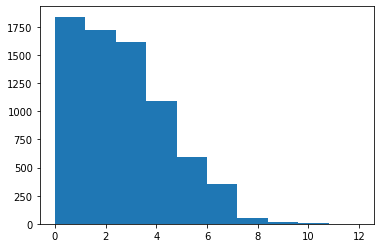

In [122]:
plt.hist(data.Total_Goals)

Since we are in the discrete space, and given the above chart, I think a Poisson is a decent simple one to try initially. Given the relative closeness of 1, 2, and 3, it might not have enough flexability. Will also try a beta for this purpose. 

In [133]:
import pandas as pd
import numpy as np
import scipy
from sklearn.preprocessing import StandardScaler
import scipy.stats as stats
import matplotlib.pyplot as plt

In [134]:
dist = getattr(stats, 'beta')
parameters = dist.fit(data.Total_Goals)
print(parameters)

(2.573219303694584, 8.490126693270835, -0.5708582579540292, 14.087358157814169)


In [136]:
stats.kstest(data.Total_Goals, "beta", parameters)

KstestResult(statistic=0.13826587102549814, pvalue=1.0389576009161855e-121)

In [ ]:
stats.beta.pdf()